In [1]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

In [14]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'dog':
            label=1
        elif label == 'cat':
            label=0
        print(label)  
            
        return img_transformed,label

In [5]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

In [6]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

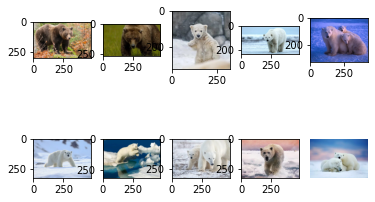

In [7]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [13]:
print(train_list[0].split('/')[1].split('.')[1])

polar_bears


In [15]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [18]:
print(train_data[0][0])

dataset/dataset_random_name\00001.polar_bears.jpg
polar_bears
(tensor([[[0.5569, 0.5569, 0.5608,  ..., 0.2314, 0.2118, 0.2118],
         [0.5569, 0.5569, 0.5608,  ..., 0.2314, 0.2118, 0.2118],
         [0.5490, 0.5490, 0.5529,  ..., 0.2275, 0.2078, 0.2078],
         ...,
         [0.3137, 0.3137, 0.3059,  ..., 0.2941, 0.2980, 0.2980],
         [0.3020, 0.3020, 0.2941,  ..., 0.2980, 0.3020, 0.3020],
         [0.3020, 0.3020, 0.2941,  ..., 0.2980, 0.3020, 0.3020]],

        [[0.7294, 0.7294, 0.7294,  ..., 0.2588, 0.2392, 0.2392],
         [0.7294, 0.7294, 0.7294,  ..., 0.2588, 0.2392, 0.2392],
         [0.7255, 0.7255, 0.7255,  ..., 0.2549, 0.2353, 0.2353],
         ...,
         [0.5647, 0.5647, 0.5608,  ..., 0.5529, 0.5529, 0.5529],
         [0.5569, 0.5569, 0.5529,  ..., 0.5529, 0.5569, 0.5569],
         [0.5569, 0.5569, 0.5529,  ..., 0.5529, 0.5569, 0.5569]],

        [[0.9176, 0.9176, 0.9216,  ..., 0.2863, 0.2549, 0.2549],
         [0.9176, 0.9176, 0.9216,  ..., 0.2863, 0.2549, 0.25